This is used to evalutae the top structures predicted by the embedding model trained with structures reported in the past. 

In [1]:
import pandas as pd
import numpy as np
from gensim.models.doc2vec import Doc2Vec
from mofgraph2vec.featurize.mof2doc import MOF2doc
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

/Users/xiaoqi/opt/miniconda3/envs/mofgraph2vec/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/xiaoqi/opt/miniconda3/envs/mofgraph2vec/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/xiaoqi/opt/miniconda3/envs/mofgraph2vec/l

Model path
- 2005: offline-run-20230605_174437-o6rw3739
- 2006: offline-run-20230605_231233-yplyysv0
- 2007: offline-run-20230606_085543-lkf3rd3h
- 2008: offline-run-20230606_085627-k4qvhy4i
- 2009: offline-run-20230606_094442-a3k1tnnc
- 2010: offline-run-20230606_094606-b0ysvlov

In [2]:
df = pd.read_csv("../data/md-core.csv")

In [32]:
# model for 2005: offline-run-20230605_174437-o6rw3739
m_2005 = Doc2Vec.load("../experiments/workflow/wandb/offline-run-20230605_174437-o6rw3739/tmp/embedding_model.pt")
m_2006 = Doc2Vec.load("../experiments/workflow/wandb/offline-run-20230605_231233-yplyysv0/tmp/embedding_model.pt")
m_2007 = Doc2Vec.load("../experiments/workflow/wandb/offline-run-20230606_085543-lkf3rd3h/tmp/embedding_model.pt")
m_2008 = Doc2Vec.load("../experiments/workflow/wandb/offline-run-20230606_085627-k4qvhy4i/tmp/embedding_model.pt")
m_2009 = Doc2Vec.load("../experiments/workflow/wandb/offline-run-20230606_094442-a3k1tnnc/tmp/embedding_model.pt")

In [4]:
test_corpus_config = {
  "embed_label": False,
  "label_path": "../../data/md-core.csv",
  "labels_to_embed": ["outputs.logKH_CO2", "outputs.logKH_CH4"],
  "id_column": "info.name",
  "wl_step": 2,
  "n_components": 2,
  "use_hash": False,
  "writing_style": "paragraph",
  "composition": False,
  "mode": "all",
  "embed_cif": False
}

In [33]:
test_2005 = MOF2doc(
    cif_path=["../data/cifs/md_2006/"], **test_corpus_config
).get_documents()

test_2006 = MOF2doc(
    cif_path=['../data/cifs/md_2007/'], **test_corpus_config
).get_documents()

test_2007 = MOF2doc(
    cif_path=["../data/cifs/md_2008/"], **test_corpus_config
).get_documents()

test_2008 = MOF2doc(
    cif_path=['../data/cifs/md_2009/'], **test_corpus_config
).get_documents()

100%|██████████| 99/99 [00:00<00:00, 343.14it/s]


In [6]:
infer_2005 = [m_2005.infer_vector(c.words) for c in test_2005]
name_2005 = [c.tags[0] for c in test_2005]

In [7]:
infer_2006 = [m_2006.infer_vector(c.words) for c in test_2006]
name_2006 = [c.tags[0] for c in test_2006]

In [34]:
infer_2007 = [m_2007.infer_vector(c.words) for c in test_2007]
name_2007 = [c.tags[0] for c in test_2007]

In [35]:
infer_2008 = [m_2008.infer_vector(c.words) for c in test_2008]
name_2008 = [c.tags[0] for c in test_2008]

In [8]:
co2_2005 = [m_2005.wv["outputs.logKH_CO2_%s" %i] for i in range(10)]
ch4_2005 = [m_2005.wv["outputs.logKH_CH4_%s" %i] for i in range(10)]

In [9]:
co2_2006 = [m_2006.wv["outputs.logKH_CO2_%s" %i] for i in range(10)]
ch4_2006 = [m_2006.wv["outputs.logKH_CH4_%s" %i] for i in range(10)]

In [36]:
co2_2007 = [m_2007.wv["outputs.logKH_CO2_%s" %i] for i in range(10)]
ch4_2007 = [m_2007.wv["outputs.logKH_CH4_%s" %i] for i in range(10)]

co2_2008 = [m_2008.wv["outputs.logKH_CO2_%s" %i] for i in range(10)]
ch4_2008 = [m_2008.wv["outputs.logKH_CH4_%s" %i] for i in range(10)]

In [10]:
cos_co2_2005_9 = [cosine_similarity(vec.reshape(1,-1), co2_2005[-1].reshape(1,-1))[0,0] for vec in infer_2005]
cos_co2_2005_8 = [cosine_similarity(vec.reshape(1,-1), co2_2005[-2].reshape(1,-1))[0,0] for vec in infer_2005]
cos_co2_2005_7 = [cosine_similarity(vec.reshape(1,-1), co2_2005[-3].reshape(1,-1))[0,0] for vec in infer_2005]


In [28]:
cos_co2_2005 = [(m+n)/2 for m, n in zip(cos_co2_2005_8, cos_co2_2005_9)]

In [29]:
rank_2005 = [name for _, name in sorted(zip(cos_co2_2005, name_2005))]

In [30]:
bench_2005 = df[df["info.year"] == 2006][["info.name", "outputs.logKH_CO2"]].sort_values(by="outputs.logKH_CO2")

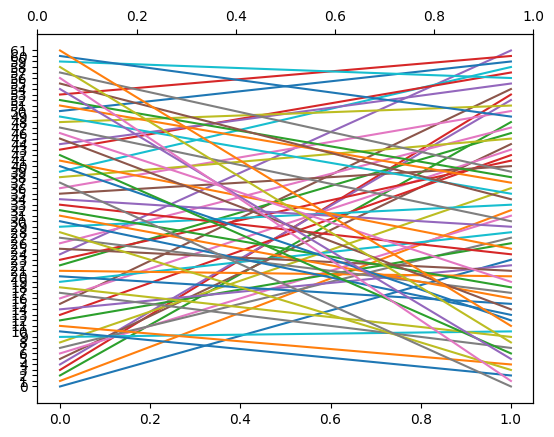

In [31]:
fig, ax = plt.subplots()
ax2 = ax.twiny()

ax.set_yticks(range(len(rank_2005)))
ax2.set_yticks(range(len(rank_2005)))
#ax.set_yticklabels(bench_2005["info.name"])
#ax2.set_yticklabels(rank_2005)

for i, n_i in enumerate(bench_2005["info.name"]):
    for j, n_j in enumerate(rank_2005):
        if n_i == n_j:
            ax.plot([0,1], [i,j])

In [15]:
cos_co2_2006_9 = [cosine_similarity(vec.reshape(1,-1), co2_2006[-1].reshape(1,-1))[0,0] for vec in infer_2006]
cos_co2_2006_8 = [cosine_similarity(vec.reshape(1,-1), co2_2006[-2].reshape(1,-1))[0,0] for vec in infer_2006]
cos_co2_2006_7 = [cosine_similarity(vec.reshape(1,-1), co2_2006[-3].reshape(1,-1))[0,0] for vec in infer_2006]

In [24]:
cos_co2_2006 = cos_co2_2006_9 #[(m+n)/2 for m, n in zip(cos_co2_2006_8, cos_co2_2006_9)]

In [25]:
rank_2006 = [name for _, name in sorted(zip(cos_co2_2006, name_2006))]
bench_2006 = df[df["info.year"] == 2007][["info.name", "outputs.logKH_CO2"]].sort_values(by="outputs.logKH_CO2")

In [26]:
len(rank_2006), len(bench_2006)

(76, 76)

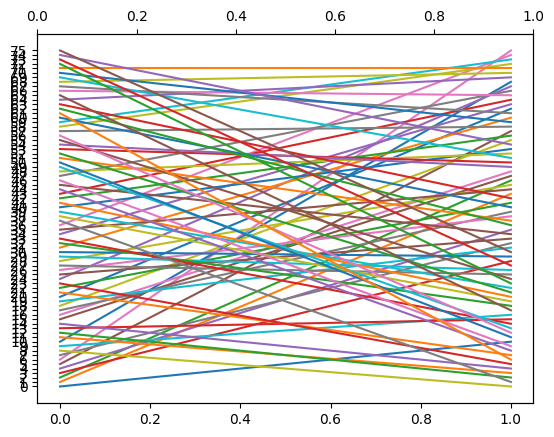

In [27]:
fig, ax = plt.subplots()
ax2 = ax.twiny()

ax.set_yticks(range(len(rank_2006)))
ax2.set_yticks(range(len(rank_2006)))
#ax.set_yticklabels(bench_2005["info.name"])
#ax2.set_yticklabels(rank_2005)

for i, n_i in enumerate(bench_2006["info.name"]):
    for j, n_j in enumerate(rank_2006):
        if n_i == n_j:
            ax.plot([0,1], [i,j])

In [37]:
def get_two_ranks(year, co2_9, co2_8, names, infers):
    cos_co2_9 = [cosine_similarity(vec.reshape(1,-1), co2_9.reshape(1,-1))[0,0] for vec in infers]
    cos_co2_8 = [cosine_similarity(vec.reshape(1,-1), co2_8.reshape(1,-1))[0,0] for vec in infers]
    cos_co2 = [(m+n)/2 for m, n in zip(cos_co2_8, cos_co2_9)]
    
    rank = [name for _, name in sorted(zip(cos_co2, names))]
    bench = df[df["info.year"] == year][["info.name", "outputs.logKH_CO2"]].sort_values(by="outputs.logKH_CO2")
    print(len(rank), len(bench))
    return bench, rank

In [38]:
bench_2007, rank_2007 = get_two_ranks(2008, co2_2007[-1], co2_2007[-2], name_2007, infer_2007)

85 85


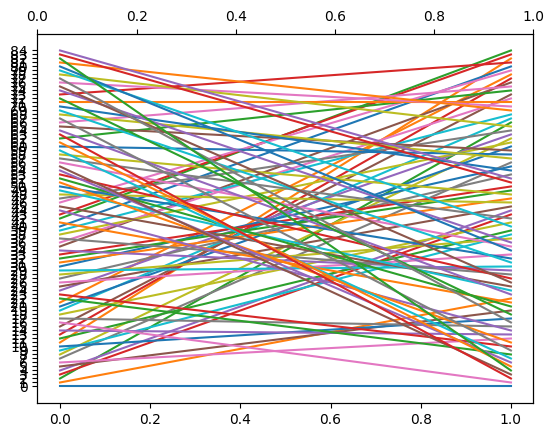

In [39]:
fig, ax = plt.subplots()
ax2 = ax.twiny()

ax.set_yticks(range(len(rank_2007)))
ax2.set_yticks(range(len(rank_2007)))
#ax.set_yticklabels(bench_2005["info.name"])
#ax2.set_yticklabels(rank_2005)

for i, n_i in enumerate(bench_2007["info.name"]):
    for j, n_j in enumerate(rank_2007):
        if n_i == n_j:
            ax.plot([0,1], [i,j])

In [40]:
bench_2008, rank_2008 = get_two_ranks(2009, co2_2008[-1], co2_2008[-2], name_2008, infer_2008)

99 99


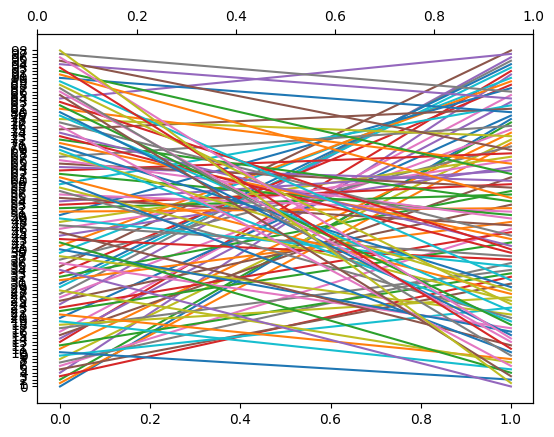

In [41]:
fig, ax = plt.subplots()
ax2 = ax.twiny()

ax.set_yticks(range(len(rank_2008)))
ax2.set_yticks(range(len(rank_2008)))
#ax.set_yticklabels(bench_2005["info.name"])
#ax2.set_yticklabels(rank_2005)

for i, n_i in enumerate(bench_2008["info.name"]):
    for j, n_j in enumerate(rank_2008):
        if n_i == n_j:
            ax.plot([0,1], [i,j])

In [42]:
m_test = Doc2Vec.load("../experiments/workflow/wandb/offline-run-20230606_230527-mbe4wst4/tmp/embedding_model.pt")

In [48]:
m_test.dv['outputs.logKH_CH4_5']

(128,)

In [51]:
m_test.dv.most_similar('outputs.logKH_CO2_9')

[('XECJUK_manual', 0.8262608647346497),
 ('JEXSOV_clean', 0.8222208619117737),
 ('YIDSOT_clean', 0.7197738885879517),
 ('EGOZAB_clean', 0.6906731724739075),
 ('NIRNAD_clean', 0.6867928504943848),
 ('KUDMAY_clean', 0.6702030301094055),
 ('YOZQEK_clean', 0.6615914702415466),
 ('GAJVAQ_clean', 0.6614204049110413),
 ('XADDAJ01_clean', 0.6606771945953369),
 ('VETVAS_manual', 0.6547608971595764)]

In [52]:
df[df["info.name"] == "XECJUK_manual"]["outputs.logKH_CO2"]

1938   -1.119
Name: outputs.logKH_CO2, dtype: float64

In [53]:
df[df["info.name"] == "JEXSOV_clean"]["outputs.logKH_CO2"]

690   -1.776
Name: outputs.logKH_CO2, dtype: float64

In [56]:
df[df["info.name"] == "NIRNAD_clean"]["outputs.logKH_CO2"]

587   -0.846
Name: outputs.logKH_CO2, dtype: float64

In [58]:
df[df["info.name"] == "EGOZAB_clean"]["outputs.logKH_CO2"]

1665   -4.164
Name: outputs.logKH_CO2, dtype: float64

In [59]:
df[df["info.name"] == "KUDMAY_clean"]["outputs.logKH_CO2"]

635   -4.52
Name: outputs.logKH_CO2, dtype: float64